In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [99]:
df = pd.read_csv('./Project_1/ACME-HappinessSurvey2020.csv')

In [360]:
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [361]:
df.tail()

,Y,X1,X2,X3,X4,X5,X6
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5
125,0,5,3,2,5,5,5


## Data Description:

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
X1 = my order was delivered on time
X2 = contents of my order was as I expected
X3 = I ordered everything I wanted to order
X4 = I paid a good price for my order
X5 = I am satisfied with my courier
X6 = the app makes ordering easy for me 

In [7]:
df.shape

(126, 7)

In [324]:
df_columns = df.columns
df_columns

Index(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      126 non-null    int64
 1   X2      126 non-null    int64
 2   X3      126 non-null    int64
 3   X4      126 non-null    int64
 4   X5      126 non-null    int64
 5   X6      126 non-null    int64
dtypes: int64(6)
memory usage: 6.0 KB


In [3]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Now, I show the share of each rating value for each feature for both happy(Y=1), and unhappy(Y=0) atributes of the target column. This is ddone with both making tabels and plots of the counted values!

In [4]:
df_columns= ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
def valuecounter_Y1(columns, df):
    list_of_seriesY1 = []
    for x in columns:
        c=df.loc[df['Y']==1, [x]].value_counts()
        list_of_seriesY1.append(c)
    df_counted_values = pd.concat(list_of_seriesY1, axis =1)
    df_counted_values.rename(columns={x:y for x, y in zip(df_counted_values.columns, columns)}, inplace=True)
    df_counted_values[df_counted_values.isnull()] = 0
    df_counted_values.rename_axis('Rate', inplace = True)
    return df_counted_values
    
    
def valuecounter_Y0(columns, df):
    list_of_seriesY0 = []
    for x in columns:
        c=df.loc[df['Y']==0, [x]].value_counts()
        list_of_seriesY0.append(c)
    df_counted_values = pd.concat(list_of_seriesY0, axis =1)
    df_counted_values.rename(columns={x:y for x, y in zip(df_counted_values.columns, columns)}, inplace=True)
    df_counted_values[df_counted_values.isnull()] = 0
    df_counted_values.rename_axis('Rate', inplace = True)
    return df_counted_values


Y1 = valuecounter_Y1(df_columns, df)
Y0 = valuecounter_Y0(df_columns, df)
print(f"Counted values for the rates of each feature column for Y=1: \n\n{Y1} \n\n and for Y=0: \n\n  {Y0}")


Counted values for the rates of each feature column for Y=1: 

        X1  X2  X3  X4  X5    X6
Rate                            
5     45.0   4  11  15  22  35.0
4     16.0   7  22  30  28  27.0
3      8.0  23  26  21  10   6.0
2      0.0  21   7   1   7   0.0
1      0.0  14   3   2   2   1.0 

 and for Y=0: 

          X1  X2  X3    X4  X5    X6
Rate                              
4     24.0  10  11  23.0  22  20.0
5     20.0   2   6  10.0   9  22.0
3     12.0  19  29  20.0  12  14.0
1      1.0  13   4   0.0   5   0.0
2      0.0  13   7   4.0   9   1.0


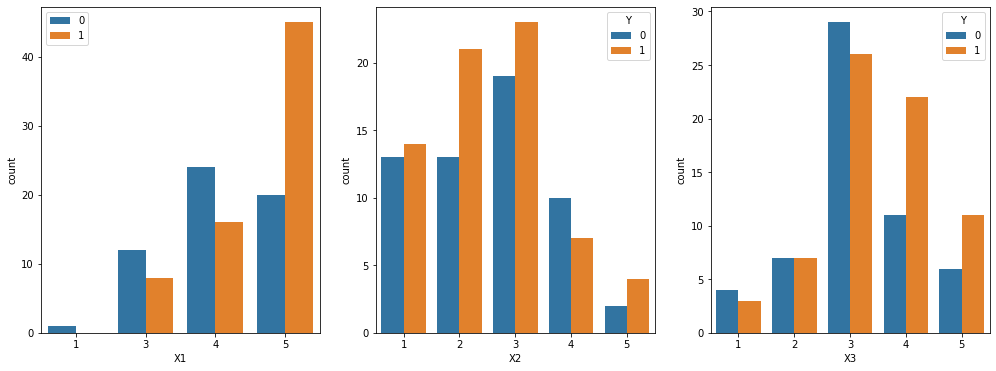

In [297]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(17,6))
x1 = sns.countplot(x = 'X1', hue = "Y", ax=ax[0], data = df)
x1.legend(loc =2)
x2 = sns.countplot(x = 'X2', hue = "Y", ax=ax[1], data = df)
x3 = sns.countplot(x = 'X3', hue = "Y", ax=ax[2], data = df)

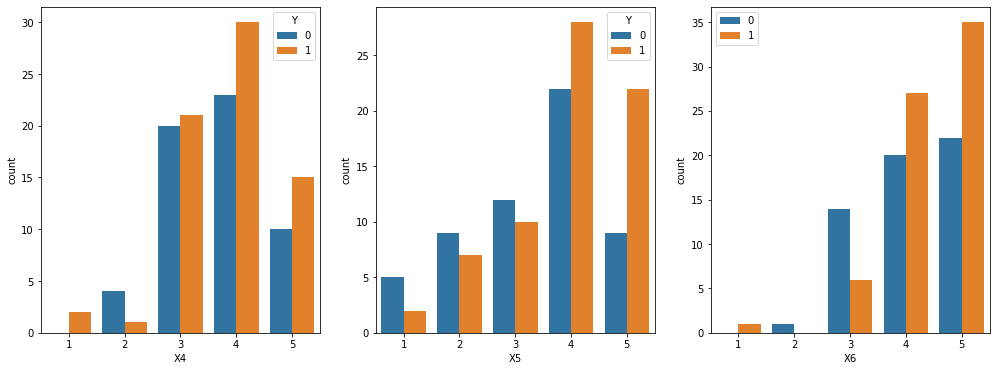

In [5]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(17,6))
x4 = sns.countplot(x = 'X4', hue = "Y", ax=ax[0], data = df)
x5 = sns.countplot(x = 'X5', hue = "Y", ax=ax[1], data = df)
x6 = sns.countplot(x = 'X6', hue = "Y", ax=ax[2], data = df)
x6.legend(loc=2)

In [12]:
correlation=df.corr()
correlations

,Y,X1,X2,X3,X4,X5,X6
Y,1.000000,0.280160,-0.024274,0.150838,0.064415,0.224522,0.167669
X1,0.280160,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873
X2,-0.024274,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205
X3,0.150838,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750
X4,0.064415,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888
X5,0.224522,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195
X6,0.167669,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000


C:\Users\alima\AppData\Local\Temp\ipykernel_20880\3115452907.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation, dtype=np.bool)


<AxesSubplot:>

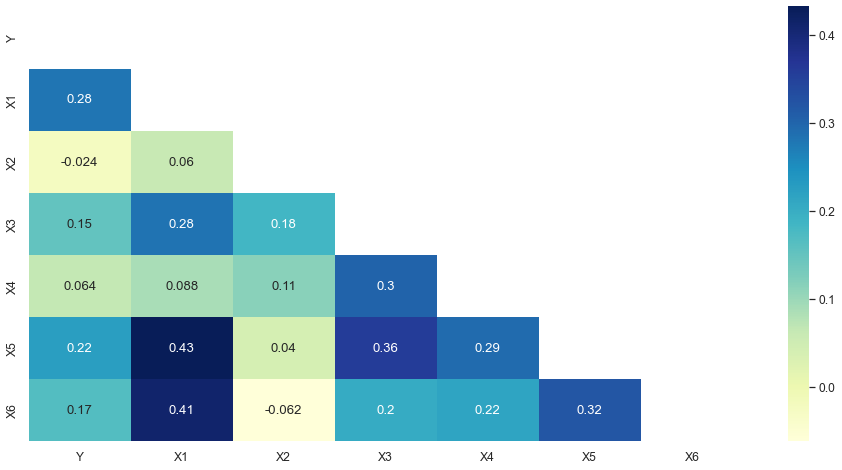

In [6]:
correlation=df.corr()
plt.figure(figsize = (16,8))
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale=1.1) 
sns.set_style("white")
sns.heatmap(correlation, mask=mask, annot=True, cmap='YlGnBu')

In [96]:
df.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [106]:
#Just to make sure there are not missing values in the other forms such as '?' and ...
for x in ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']:
    print(df[x].value_counts())

5    65
4    40
3    20
1     1
Name: X1, dtype: int64
3    42
2    34
1    27
4    17
5     6
Name: X2, dtype: int64
3    55
4    33
5    17
2    14
1     7
Name: X3, dtype: int64
4    53
3    41
5    25
2     5
1     2
Name: X4, dtype: int64
4    50
5    31
3    22
2    16
1     7
Name: X5, dtype: int64
5    57
4    47
3    20
2     1
1     1
Name: X6, dtype: int64


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [33]:
df_happyness = df.drop(['Y'], axis=1) 
df_happyness

,X1,X2,X3,X4,X5,X6
0,3,3,3,4,2,4
1,3,2,3,5,4,3
2,5,3,3,3,3,5
3,5,4,3,3,3,5
4,5,4,3,3,3,5
...,...,...,...,...,...,...
121,5,2,3,4,4,3
122,5,2,3,4,2,5
123,5,3,3,4,4,5
124,4,3,3,4,4,5


In [11]:
y = df['Y']

### Decision Tree

In [146]:
X_train, X_test, y_train, y_test = train_test_split(
    df_happyness, y, test_size=0.3, random_state=17
)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=17)

In [147]:
tree_pred = tree.predict(X_test)
accuracy_score(y_test, tree_pred)


0.6578947368421053

In [148]:
importances = tree.feature_importances_
importances

array([0.23683916, 0.16723339, 0.07102173, 0.04776751, 0.2894885 ,
       0.18764971])

In [184]:
best_feature_index = np.argmax(importances)
best_feature = df_happyness.columns[best_feature_index]
best_score = importances[best_feature_index]
print(best_feature, best_score)

X5 0.28948850276044896


### GridSearchCV for tuning Hyperparameters!

In [185]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [188]:
X_train.shape

(88, 6)

In [197]:
n_stimators = [10, 20, 30 ,40]
max_depth = [None, 3, 5, 10]
n_randomstate = [1, 14, 17, 123]
param_grid = dict(n_estimators = n_stimators, max_depth = max_depth, random_state = n_randomstate)

In [198]:
rf = RandomForestClassifier()

grid = GridSearchCV(estimator = rf,
                   param_grid = param_grid,
                   cv = 3,
                   verbose = 2,
                   n_jobs = -1)

In [199]:
grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


In [200]:
grid_result.best_estimator_

RandomForestClassifier(max_depth=3, n_estimators=40, random_state=14)

### Random Forest

In [202]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=40, random_state=14)

In [203]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('Model accuracy score with 40 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 40 decision-trees : 0.6053


In [204]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores


X5    0.204819
X3    0.185730
X2    0.169692
X6    0.153628
X1    0.148635
X4    0.137496
dtype: float64

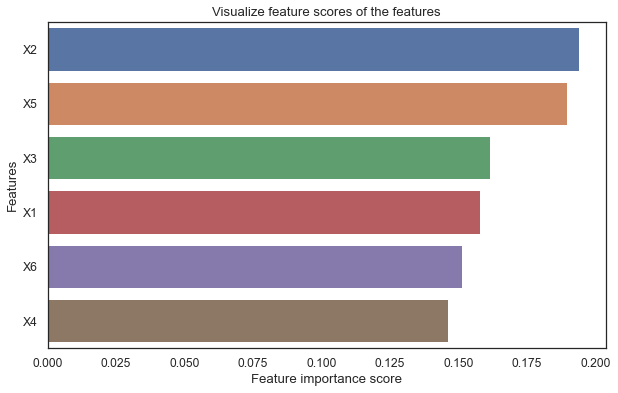

In [182]:
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

## The correct content of the order (X2) is the most important parameter in predicting the happyness of the customers!

### KNN

In [206]:
K_dependent_accuracy = []

for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    K_dependent_accuracy_tuple = (k, accuracy_score(y_test, knn_pred))
    K_dependent_accuracy.append(K_dependent_accuracy_tuple)
print(K_dependent_accuracy)

[(1, 0.6052631578947368), (2, 0.5789473684210527), (3, 0.5526315789473685), (4, 0.5526315789473685), (5, 0.5789473684210527), (6, 0.5789473684210527), (7, 0.5789473684210527), (8, 0.5263157894736842), (9, 0.5789473684210527), (10, 0.5789473684210527), (11, 0.5263157894736842), (12, 0.5789473684210527), (13, 0.5526315789473685), (14, 0.6052631578947368), (15, 0.5789473684210527), (16, 0.5789473684210527), (17, 0.5789473684210527), (18, 0.5263157894736842), (19, 0.5789473684210527), (20, 0.5526315789473685)]


In [207]:
knn = KNeighborsClassifier(n_neighbors =14)
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [208]:
feature_scores = {}

for feature in df_happyness:
    X_feature = df_happyness[feature].values.reshape(-1, 1)
    scores = cross_val_score(knn, X_feature, y, cv=stratified_kfold, scoring='accuracy')
    feature_scores[feature] = scores.mean()
feature_scores

{'X1': 0.6501538461538463,
 'X2': 0.42953846153846154,
 'X3': 0.5563076923076923,
 'X4': 0.4046153846153846,
 'X5': 0.548,
 'X6': 0.5467692307692308}

In [209]:
best_feature = max(feature_scores, key=feature_scores.get)
best_score = feature_scores[best_feature]
print(best_feature, best_score)

X1 0.6501538461538463


## By KNN method the best feature to predict the happyness of customers is X1